import dependencies

In [ ]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Import ConfusionMatrixDisplay instead of plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

load data

In [ ]:
#read data directly from a github repository

file_url='https://github.com/vappiah/Machine-Learning-Tutorials/raw/main/datasets/cancer_gene_expression.zip'

df=pd.read_csv(file_url)

In [ ]:
df

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,2.933384,0.0,1.683921,0.0,0.0,0.0,0.0,0.635336,1.252839,...,9.985842,9.469967,4.225275,6.955336,11.722206,7.309940,10.986119,6.396848,1.252839,BRCA
797,0.0,0.000000,0.0,2.772625,0.0,0.0,0.0,0.0,0.534759,3.761764,...,12.334681,8.157327,1.482797,6.758183,11.403838,9.005347,11.012045,5.386625,1.697640,COAD
798,0.0,0.408277,0.0,1.854754,0.0,0.0,0.0,0.0,0.000000,0.986520,...,11.671992,8.859616,6.393828,6.427115,11.596586,7.454127,10.718533,5.507417,1.398131,BRCA
799,0.0,0.639232,0.0,3.226971,0.0,0.0,0.0,0.0,1.921322,0.639232,...,12.237087,5.753976,4.192478,6.614875,11.183245,7.544261,10.649382,5.282158,0.639232,BRCA


In [ ]:
#let's check the number of samples and features
#note:the last column contain the labels. it is not considered as a feature

print(df.shape)

(801, 8001)


In [ ]:
#let's check some of the columns (first, second and third columns)
print(df.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [ ]:
#lets check the name of the last column of this dataframe

df.columns[-1]

'Cancer_Type'

In [ ]:
#check for missing values
datanul=df.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [ ]:
#let's check how many different cancer types are there in the data
#note: in this tutorial the cancer types will be referred to as classes or labels

print(df['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


| Abbreviation | Full Form                             |
| ------------ | ------------------------------------- |
| **BRCA**     | **Breast Invasive Carcinoma**         |
| **KIRC**     | **Kidney Renal Clear Cell Carcinoma** |
| **LUAD**     | **Lung Adenocarcinoma**               |
| **PRAD**     | **Prostate Adenocarcinoma**           |
| **COAD**     | **Colon Adenocarcinoma**              |


<Axes: xlabel='Cancer_Type'>

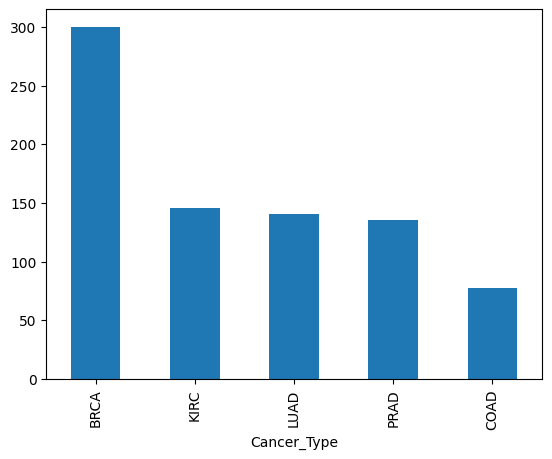

In [ ]:
#plot a bar chat to display the class distribution
df['Cancer_Type'].value_counts().plot.bar()

In [ ]:
#we will now seperate the feature values from the class. we do this because scikit-learn requires that features and class are separated before parsing them to the classifiers.

X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
X.shape

(801, 8000)

In [ ]:
y.shape

(801,)

In [ ]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [ ]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [ ]:
classes

array([0, 1, 2, 3, 4])

In [ ]:
#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [ ]:
df.iloc[:,0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231


In [ ]:
df.shape

(801, 8001)

In [ ]:
# scale data between 0 and 1

min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [ ]:
len(X_train_norm)

640

In [ ]:
len(X_test_norm)

161

In [ ]:
MI=mutual_info_classif(X_train_norm,y_train)

In [ ]:
#select top n features. lets say 300.
#you can modify the value and see how the performance of the model changes

n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [ ]:
X_train_selected=X_train_norm[:,selected_scores_indices]
X_test_selected=X_test_norm[:,selected_scores_indices]

In [ ]:
X_train_selected.shape

(640, 300)

In [ ]:
X_test_selected.shape

(161, 300)

In [ ]:
#Random Forest Classifier
#because we are dealing with multiclass data, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred =RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

In [ ]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9550
precision:0.9695
recall:0.9689
f1score:0.9687


classification report


              precision    recall  f1-score   support

        BRCA       0.95      0.98      0.97        60
        COAD       1.00      0.88      0.93        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.92      0.92      0.92        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.97       161
   macro avg       0.97      0.96      0.96       161
weighted avg       0.97      0.97      0.97       161



In [ ]:
#generate confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)

In [ ]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,59,0,0,1,0
COAD,1,14,0,1,0
KIRC,0,0,28,0,0
LUAD,2,0,0,22,0
PRAD,0,0,0,0,33


Text(50.722222222222214, 0.5, 'True Labels')

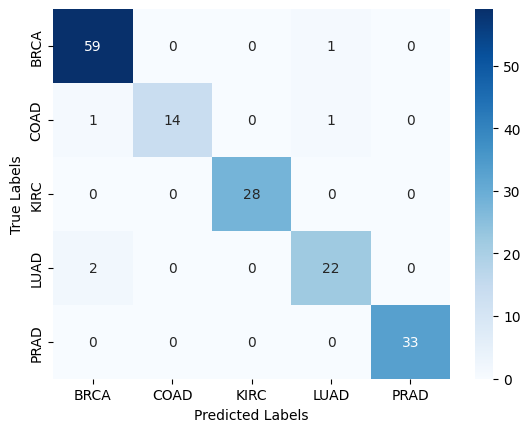

In [ ]:
#visualize the confusion matrix using seaborn

sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

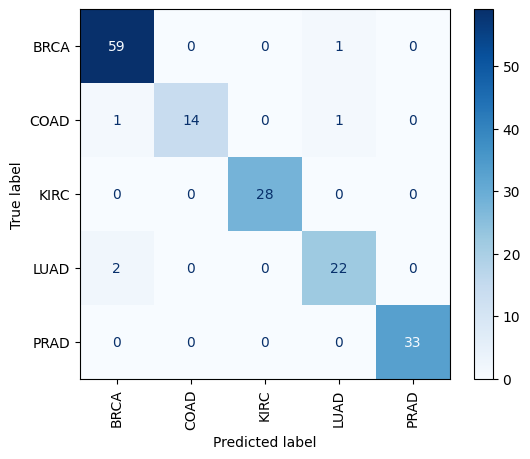

In [ ]:
#visualize the confusion matrix directly
disp = ConfusionMatrixDisplay.from_estimator(RF, X_test_selected, y_test, xticks_rotation='vertical', cmap='Blues', display_labels=labels)

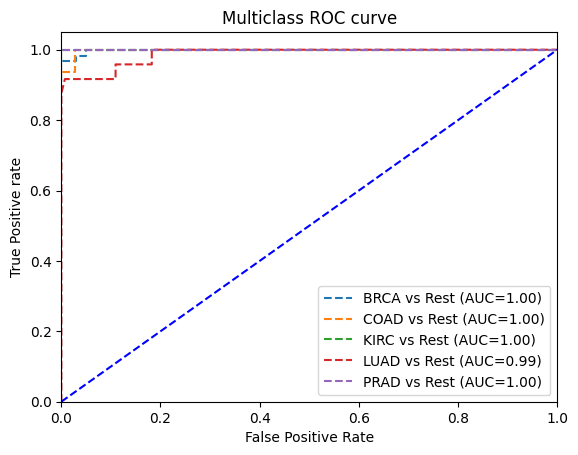

In [ ]:
#roc curves will be generated for each class
#we will therefore have to binarize the y_test labels
#this is done because the probabilities(pred_prob) are calculated for each each class
#we therefore need to put the y_test label in the same format as the pred_prob
y_test_binarized=label_binarize(y_test,classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import joblib

joblib.dump(RF, 'rf_model.pkl')
joblib.dump(min_max_scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(selected_scores_indices, 'selected_features.pkl')


['selected_features.pkl']

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import numpy as np
import joblib

# Load the saved model components
model = joblib.load('rf_model.pkl')                   # Trained OneVsRestClassifier
scaler = joblib.load('scaler.pkl')                    # Trained MinMaxScaler
label_encoder = joblib.load('label_encoder.pkl')      # Fitted LabelEncoder
selected_indices = joblib.load('selected_features.pkl')  # Top 300 feature indices

# Prediction function: accepts a sequence of gene expression values
def predict_cancer_from_sequence(seq):
    try:
        # Convert comma-separated string to float list
        values = list(map(float, seq.strip().split(',')))

        # Check if length matches expected feature count
        if len(values) != len(scaler.feature_names_in_):
            return f"⚠️ Expected {len(scaler.feature_names_in_)} values, but got {len(values)}"

        # Convert to numpy array and reshape
        input_array = np.array(values).reshape(1, -1)

        # Scale and select top features
        input_scaled = scaler.transform(input_array)
        input_selected = input_scaled[:, selected_indices]

        # Predict
        prediction = model.predict(input_selected)
        predicted_class = label_encoder.inverse_transform(prediction)

        return f"🧬 Predicted Cancer Type: {predicted_class[0]}"

    except Exception as e:
        return f"❌ Error: {str(e)}"

# Gradio Interface
gr.Interface(
    fn=predict_cancer_from_sequence,
    inputs=gr.Textbox(
        label="Enter Gene Expression Sequence (comma-separated)",
        placeholder="1.23, 0.87, 0.56, ..., 0.94"
    ),
    outputs="text",
    title="Cancer Type Prediction from Gene Expression",
    description="Paste gene expression values (20531 total, comma-separated).",
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://486166e34be3de650c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv("/content/cancer_gene_expression.csv")

# Get the second row (index 1), excluding the label column
row_values = df.iloc[2, :-1].values

# Convert to comma-separated string
formatted_row = ', '.join(map(str, row_values))

print(formatted_row)

0.0, 0.0, 0.0, 4.74664598834, 0.0, 0.0, 0.0, 0.0, 2.63941740915, 1.65709117371, 0.0, 6.27254021148, 0.0, 0.0, 0.0, 0.387031609526, 0.0, 0.0, 6.84355679938, 0.0, 0.691891444525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.932557296, 0.0, 0.0, 0.0, 0.0, 1.79139734815, 2.48938879332, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.5081711186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.6895263112, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.387031609526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.387031609526, 0.0, 0.0, 0.0, 0.387031609526, 0.0, 0.0, 0.0, 0.387031609526, 0.691891444525, 0.0, 0.0, 0.0, 0.0, 0.0, 8.49462361487, 9.7652546003, 0.0, 0.0, 0.0, 11.0412895335, 3.47946340209, 0.0, 2.4080868295, 0.387031609526, 13.0416728394, 0.0, 10.4560360629, 0.0, 7.00433284325, 11.2713287903, 10.6754807592, 0

In [ ]:
import heapq

# Create a min-heap
heap = []
heapq.heappush(heap, -3)
heapq.heappush(heap, -1)
heapq.heappush(heap, -5)
heapq.heappush(heap, -2)

print(heap)  # [1, 2, 5, 3]

# Pop smallest element
print(-heapq.heappop(heap))  # 1


[-5, -2, -3, -1]
5
